**10 песен группы СЕКТОР ГАЗА** (Данные взяты с  https://pesni.guru)

1. Сектор Газа - Лирика
2. Сектор Газа - Демобилизация
3. Сектор Газа - Туман
4. Сектор Газа - Твой звонок
5. Сектор Газа - Пора домой
6. Сектор Газа - Укус вампира
7. Сектор Газа - Ночь перед Рождеством
8. Сектор Газа - Колхозный панк
9. Сектор Газа - Местные
10. Сектор Газа - Мне сегодня 30 лет!

In [1]:
!pip install wordcloud
!pip install natasha
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 73.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=1b988d1ccbfbc146552e0be624fc39713143c8a9e5e2e4d6d9dbb50616d9a219
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26094 sha256=45a595b85cda05bf1de69b6afd1493119057eb5b91348cfa7a82d2c4446530ad
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree


In [2]:
import os # библиотеки работы с папками и системой

# и другие уже известные нам библиотеки
import pandas as pd
import numpy as np

import re # регулярные выражения: предобработка текстов, строить признаки-шаблоны на слова и подстроки текста и многое другое
import string # работа со строками (в тч пунктуация)
import gensim
# импортируем основную библиотеку для работы с текстом
import nltk # пакет для символьной и статистической обработки естественного языка
from nltk.tokenize import word_tokenize, sent_tokenize #токенизация текста (слов, предложений)
from nltk.corpus import stopwords # набор стоп-слов из библиотеки
# Корпус UnigramTagger - теггер, который выбирает для каждого слова ту часть речи,
# с которой оно чаще всего встречалось в обучающем корпусе.
from nltk.tag import UnigramTagger

from nltk.stem import PorterStemmer # Метод, который принимает слово в качестве входного аргумента и возвращает слово, уменьшается до его корневой формы
from nltk.stem import WordNetLemmatizer # проставить соответствующий POS-тег для каждого слова при обработке текстов

import pymorphy2 # Для русского и украинского языка
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from bokeh.models import ColumnDataSource, LabelSet, HoverTool
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
# объект для лемматизации MorphVocab
# извлечение эмбеддингов из текста NewsEmbedding
# объект для синтаксического анализа NewsSyntaxParser
# извлечение имен собственных из текста NamesExtractor
# извлечение тэгов по морфологии NewsMorphTagger
# Segmenter
# создание объекта документа (можно создать из предложения, потом с ним работать и парсить, анализировать) Doc
from natasha import MorphVocab, NewsEmbedding, NewsSyntaxParser, NamesExtractor, NewsMorphTagger, Doc, Segmenter, NewsNERTagger

import wordcloud # отображение на графике мешка слов

from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt # визуализация данных

from sklearn.feature_extraction.text import CountVectorizer # модель мешок слов
from sklearn.feature_extraction.text import TfidfVectorizer # модель TF IDF

In [3]:
# загрузим модули nltk
#Удаление знаков препинания
nltk.download('punkt')

# Удаление стоп-слов
nltk.download('stopwords')

# Лексическая БД английского языка
nltk.download('wordnet')

# Разметчик использует алгоритм персептрона, чтобы определить, какой POS-тег присвоить тому или иному слову
nltk.download('averaged_perceptron_tagger')

# Загрузить список доступных тэгов для POS обработки
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [4]:
def read_text(filename):
    #Функция чтения файла
    text = ''
    with open(f'/content/sample_data/{filename}.txt', 'r', encoding='utf-8') as f:
        text = f.read()
        text = text.replace('\n', ' ')
    return text

# Загрузка данных 10 песен из файла txt

In [5]:
text_song = []
text_song.append(read_text('sector')) #чтение данных
sent_song = sent_tokenize(text_song[0]) # разбиение на предложения
clear_sent_song = []
# удаление знаков препинания
for i in sent_song:
    clear_sent_song.append(re.sub(r'[^\w\s]', '', i))

# приведение в нижний регистр
clear_sent_song = [word.lower() for word in clear_sent_song]
clear_sent_song

['сигарета мелькает во тьме ветер пепел в лицо швырнул мне и обугленный фильтр на пальцах мне оставил ожог',
 'скрипнув сталью открылася дверь ты идёшь ты моя теперь я приятную дрожь ощущаю с головы до ног',
 'ты со мною забудь обо всём эта ночь нам покажется сном я возьму тебя и прижму как родную дочь',
 'оо',
 'нас окутает дым сигарет ты уйдёшь как настанет рассвет и следы на постели напомнят про счастливую ночь',
 'эротичный лунный свет запретит сказать тебе нет и опустится плавно на пол всё твоё бельё шум деревьев и ветер ночной стон заглушат и твой и мой и биение сердца пылающего адским огнём',
 'ты со мною забудь обо всём эта ночь нам покажется сном я возьму тебя и прижму как родную дочь',
 'оо',
 'нас окутает дым сигарет ты уйдёшь как настанет рассвет и следы на постели напомнят про счастливую ночь',
 'твои бёдра в сияньи луны так прекрасны и мне так нужны кровь тяжёлым напором ударит прямо в сердце мне груди плавно качнутся в ночи слышишь как моё сердце стучит',
 'два пылающих 

## График предложения WordCloud

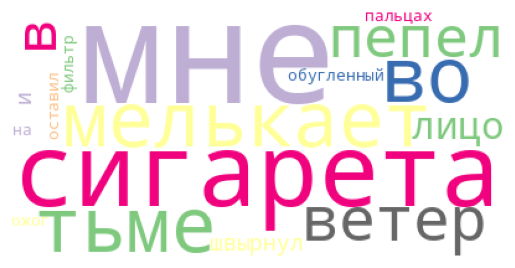

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)

i = 1

tokens = word_tokenize(clear_sent_song[0]) # разбиение на слова
text_raw = " ".join(tokens) # в одну строку все слова
wordcloud = WordCloud(colormap='Accent', background_color='white', contour_width=10).generate(text_raw) # отображение слов
plt.tick_params(labelsize=10)
plt.imshow(wordcloud)
plt.axis("off")
plt.tick_params(labelsize=10)
i += 1

# TF-IDF

In [7]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(clear_sent_song)

words_list = []
mean_words_list = []
for i in list(tfidf_vectorizer.vocabulary_.items()):
    words_list.append(i[0])
    mean_words_list.append(i[1])
df_tf_idf = pd.DataFrame({'Word': words_list})
df_tf_idf['Value'] = mean_words_list
df_tf_idf = df_tf_idf.sort_values(by=['Value'], ascending=False)
df_tf_idf

,Word,Value
558,ём,738
298,язык,737
554,ядрёный,736
191,ядовит,735
693,юности,734
...,...,...
485,pyкой,4
324,pyки,3
326,pyках,2
507,cохpани,1


Пять самых частых слов: ём, язык, ядрёный, ядовит, юности

# Word2Vec

## Подготовка данных

In [8]:
df = pd.DataFrame({'text': clear_sent_song}) # предложения песен
words_in_sent = [] # разбивка предложений на слова

for i in clear_sent_song:
  words = word_tokenize(i) # преобразуем предложение в слова
  # Удаление стоп-слов
  russian_stopwords = stopwords.words("russian") # набор русских стоп-слов
  russian_stopwords.extend(['оо', 'аа', 'ах', 'эх','б']) # добавление специфичных стоп-слов в наших песнях
  cleaned_words_song = [word if word not in russian_stopwords else "" for word in words] # очистка текста от этих стоп-слов
  cleaned_words_song = list(filter(len, cleaned_words_song)) # удаление пустых строк

  # Лематизация слов
  morph = pymorphy2.MorphAnalyzer() # анализатор
  filtered_tokens = [] # лематизированные слова
  for token in cleaned_words_song:
    p = morph.parse(str(token))[0]
    filtered_tokens.append(p.normal_form)

  # Стэмминг
  ps = PorterStemmer()
  filtered_tokens_stem = [] # примененм стэминнг
  for token in filtered_tokens:
    p = ps.stem(str(token))
    filtered_tokens_stem.append(p)
  words_in_sent.append(filtered_tokens_stem)


df['comments_words'] = words_in_sent  # записываем предобработанные комментарии в столбец 'comments_words'
df['comments'] = df['comments_words'].map(lambda x: ' '.join(x))  # записываем предобработанные комментарии без деления на слова в столбец 'comments'
df

,text,comments_words,comments
0,сигарета мелькает во тьме ветер пепел в лицо ш...,"[сигарета, мелькать, тьма, ветер, пепел, лицо,...",сигарета мелькать тьма ветер пепел лицо швырну...
1,скрипнув сталью открылася дверь ты идёшь ты мо...,"[скрипнуть, сталь, открылася, дверь, идти, при...",скрипнуть сталь открылася дверь идти приятный ...
2,ты со мною забудь обо всём эта ночь нам покаже...,"[я, забыть, о, весь, этот, ночь, мы, показатьс...",я забыть о весь этот ночь мы показаться сон вз...
3,оо,[],
4,нас окутает дым сигарет ты уйдёшь как настанет...,"[окутать, дым, сигарета, уйти, настать, рассве...",окутать дым сигарета уйти настать рассвет след...
...,...,...,...
162,в этот день я в зрелость возьму билет в этот д...,"[день, зрелость, взять, билет, день, водка, вр...",день зрелость взять билет день водка вред сего...
163,мне сегодня 30 лет,"[сегодня, 30, год]",сегодня 30 год
164,в этот день родили меня на свет в этот день с ...,"[день, родить, свет, день, иголочка, одетый, д...",день родить свет день иголочка одетый день теп...
165,в этот день скажу юности привет,"[день, сказать, юность, привет]",день сказать юность привет


## Обучение модели

In [9]:
model_w2v = gensim.models.Word2Vec(sentences=words_in_sent, window=5, min_count=1, vector_size=50, seed=0)

In [10]:
model_w2v.train(words_in_sent, total_examples=len(words_in_sent), epochs=30)

(30865, 36450)

In [11]:
def show_similar(w):
    print('Слова, близкие к слову {}:'.format(w))
    similar_words = model_w2v.wv.most_similar(positive=[w]) # наиболее похожие слова
    for w in similar_words:
        print(w)
    print('\n')

def words_for_tsne(tokenized):
    '''функция, выбирающая 200 наиболее частых слов'''
    s = stopwords.words("russian")
    count_vectorizer = CountVectorizer(max_features=200, stop_words=s)
    count_vec = count_vectorizer.fit_transform(tokenized)
    words = count_vectorizer.vocabulary_.keys()
    return words

In [12]:
print(model_w2v.wv["свет"]) # wv - словарь слов
print(show_similar("свет"))

[-0.04774577 -0.02682394  0.00022448  0.02745069  0.0566589  -0.08320583
  0.01908465 -0.07870524 -0.03192332  0.05857765  0.02837204  0.05933397
 -0.01021229  0.01228466  0.10432003 -0.01437468 -0.01996048 -0.01219114
 -0.0307751   0.04780713 -0.03791004  0.03089848 -0.00084653 -0.00573318
  0.06102124  0.02602461 -0.00109678 -0.04937643  0.00509629  0.01090418
  0.03717531  0.01192603  0.04969559 -0.07664748 -0.08445439 -0.0370516
  0.01833141 -0.00384979 -0.02626753  0.03004296 -0.02770525 -0.02685735
  0.01549669 -0.00893805 -0.07217396 -0.01267291 -0.04833507 -0.00809599
 -0.03793718  0.04199468]
Слова, близкие к слову свет:
('день', 0.9520938992500305)
('пусть', 0.9320333003997803)
('месяц', 0.9313945174217224)
('твой', 0.9260852336883545)
('иголочка', 0.9239277243614197)
('ветер', 0.9231514930725098)
('наш', 0.9154987335205078)
('взять', 0.9153314232826233)
('согреть', 0.9138944149017334)
('жизнь', 0.9132559299468994)


None


In [13]:
print(show_similar("ночь"))

Слова, близкие к слову ночь:
('дрожь', 0.952091634273529)
('ты', 0.9494932889938354)
('туман', 0.9465847015380859)
('иметь', 0.9452065229415894)
('месяц', 0.9448333978652954)
('мы', 0.9403069615364075)
('свой', 0.9399260878562927)
('рассвет', 0.9370764493942261)
('показаться', 0.932995617389679)
('день', 0.9328792095184326)


None


## Визуализация 200 наиболее часто встречающихся слов

In [14]:
ws = words_for_tsne(df['comments'])

In [15]:
ws

dict_keys(['сигарета', 'тьма', 'ветер', 'дрожь', 'забыть', 'весь', 'ночь', 'показаться', 'сон', 'взять', 'прижать', 'родный', 'дочь', 'окутать', 'дым', 'уйти', 'настать', 'рассвет', 'след', 'постель', 'напомнить', 'счастливый', 'свет', 'сказать', 'опуститься', 'всё', 'твой', 'ночной', 'сердце', 'огонь', 'луна', 'кровь', 'грудь', 'слышать', 'скорый', 'дом', 'мчаться', 'домой', 'птица', 'жизнь', 'начаться', 'аврал', 'сундук', 'демобилизация', 'приехать', 'спать', 'город', 'прижаться', 'смахнуть', 'слеза', 'рука', 'бояться', 'награда', 'получить', 'наряд', 'пятнадцать', 'сутки', 'снять', 'петлица', 'напиться', 'шея', 'туман', 'мёртвый', 'месяц', 'освещать', 'путь', 'звезда', 'воздух', 'ртуть', 'свернуть', 'пройти', 'бог', 'обман', 'земля', 'бить', 'каждый', 'пенить', 'хлестать', 'наш', 'ран', 'пойти', 'пусть', 'видно', 'ночью', 'знать', 'одежда', 'рвать', 'ураган', 'пускай', 'реветь', 'соскучиться', 'наплевать', 'злой', 'прийти', 'судьба', 'тёмный', 'лес', 'выть', 'ад', 'сеpдец', 'взвыть'

In [16]:
output_notebook()
words_top_vec = model_w2v.wv[ws]
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
words_top_tsne = tsne.fit_transform(words_top_vec)
p = figure(tools="pan,wheel_zoom,reset,save",
           toolbar_location="above",
           title="Word2Vec t-SNE for most common words", width =1000)

source = ColumnDataSource(data=dict(x1=words_top_tsne[:,0],
                                    x2=words_top_tsne[:,1],
                                    names=list(ws)))

p.scatter(x="x1", y="x2", size=8, source=source)

labels = LabelSet(x="x1", y="x2", text="names", y_offset=6,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
p.add_layout(labels)
show(p)